In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [143]:
dataset = pd.read_excel('get_around_delay_analysis.xlsx', index_col=0) 
dataset.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
505000,363965,mobile,canceled,NaN,NaN,NaN
507750,269550,mobile,ended,-81.0,NaN,NaN
508131,359049,connect,ended,70.0,NaN,NaN
508865,299063,connect,canceled,NaN,NaN,NaN
511440,313932,mobile,ended,NaN,NaN,NaN


In [144]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 21310

Display of dataset: 


,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
505000,363965,mobile,canceled,NaN,NaN,NaN
507750,269550,mobile,ended,-81.0,NaN,NaN
508131,359049,connect,ended,70.0,NaN,NaN
508865,299063,connect,canceled,NaN,NaN,NaN
511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,2,2,NaN,NaN,NaN
top,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,17003,18045,NaN,NaN,NaN
mean,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [145]:
mask = (dataset['state'] == 'ended') 

In [146]:
# I replace NaN values at column delay_at_checkout_in_minutes by zero when state is ended 

dataset['delay_at_checkout_in_minutes'] = dataset[mask]['delay_at_checkout_in_minutes'].fillna(0)

In [147]:
# Mean per checking type
dataset[mask].groupby(['checkin_type'])['delay_at_checkout_in_minutes'].mean()

checkin_type
connect   -42.296951
mobile     78.547675
Name: delay_at_checkout_in_minutes, dtype: float64

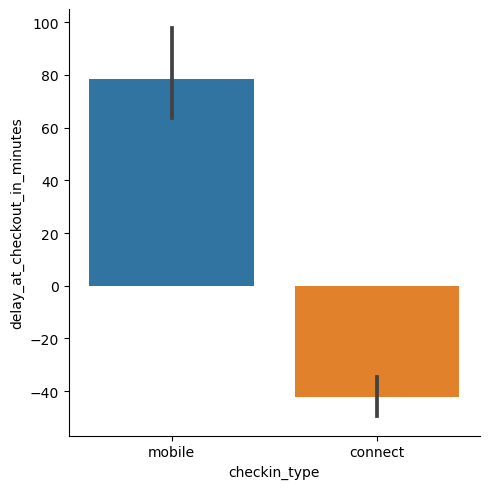

In [148]:
sns.catplot(x="checkin_type", y="delay_at_checkout_in_minutes", kind="bar", data=dataset[mask])

In [149]:
dataset['checkin_type'].value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

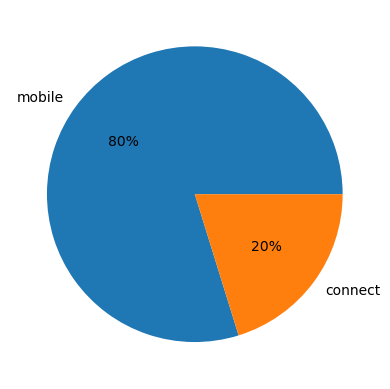

In [150]:
plt.pie(dataset['checkin_type'].value_counts(), labels=dataset['checkin_type'].value_counts().index, autopct='%1.0f%%')
plt.show()


In [151]:
#dataset where time_delta_with_previous_rental_in_minutes is not null

df_delta_not_null = dataset[dataset['time_delta_with_previous_rental_in_minutes'].notnull()]
df_delta_not_null.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
511639,370585,connect,ended,-15.0,563782.0,570.0
519491,312389,mobile,ended,58.0,545639.0,420.0
521156,392479,mobile,ended,0.0,537298.0,0.0
525044,349751,mobile,ended,0.0,510607.0,60.0
528808,181625,connect,ended,-76.0,557404.0,330.0


In [152]:
df_delta_not_null.groupby('checkin_type')['time_delta_with_previous_rental_in_minutes'].mean()

checkin_type
connect    287.675277
mobile     272.655642
Name: time_delta_with_previous_rental_in_minutes, dtype: float64

In [153]:
data_state_cancel = df_delta_not_null[df_delta_not_null['state'] == 'canceled']
data_state_cancel.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
543768,374169,connect,canceled,NaN,543010.0,210.0
546160,352528,connect,canceled,NaN,546578.0,630.0
564627,341431,mobile,canceled,NaN,552005.0,150.0
568657,317378,connect,canceled,NaN,566412.0,210.0
516550,377700,mobile,canceled,NaN,545076.0,720.0


Proportion of cancelation per type of check in

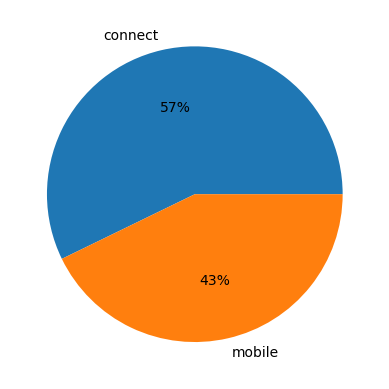

In [154]:
plt.pie(data_state_cancel['checkin_type'].value_counts(), labels=data_state_cancel['checkin_type'].value_counts().index, autopct='%1.0f%%')
plt.show()

Distribution state column

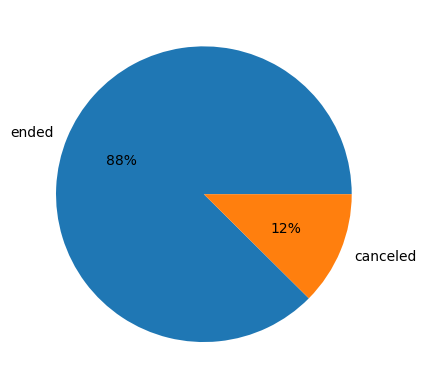

In [155]:
plt.pie(df_delta_not_null['state'].value_counts(), labels=df_delta_not_null['state'].value_counts().index, autopct='%1.0f%%')
plt.show()

Average time_delta_with_previous_rental_in_minutes when state is canceled

In [156]:
data_state_cancel.groupby('checkin_type')['time_delta_with_previous_rental_in_minutes'].mean()

checkin_type
connect    300.000000
mobile     288.061224
Name: time_delta_with_previous_rental_in_minutes, dtype: float64

We see that 12% of bookings are canceled of which 57% come from Connect cars. As 'connect' bookings represent only 20% of the total, I suggest working on this feature.
As we can see above, the average waiting time in minutes when the booking is canceled is at 300 for Connect cars. We should put a threshold of minimum delay between 2 drivers at 300min for Connect cars. 

Let's calculate the new cancelation rate when we drop all Average time_delta_with_previous_rental_in_minutes above 300min for Connect Cars

In [157]:
df_new = df_delta_not_null.drop(df_delta_not_null[(df_delta_not_null['checkin_type'] == 'connect') & (df_delta_not_null['time_delta_with_previous_rental_in_minutes'] > 300)].index)
df_new.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
519491,312389,mobile,ended,58.0,545639.0,420.0
521156,392479,mobile,ended,0.0,537298.0,0.0
525044,349751,mobile,ended,0.0,510607.0,60.0
534827,404169,mobile,ended,-7.0,531158.0,90.0
535611,397814,mobile,ended,68.0,535512.0,300.0


In [158]:
df_new['checkin_type'].value_counts()

mobile     1028
connect     489
Name: checkin_type, dtype: int64

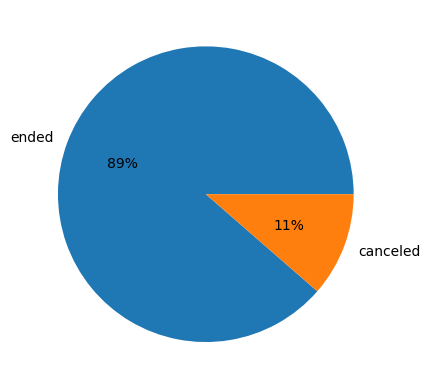

In [159]:
plt.pie(df_new['state'].value_counts(), labels=df_new['state'].value_counts().index, autopct='%1.0f%%')
plt.show()